In [1]:
# The following is a Exploratory analysis of a database 

In [2]:
#Packages to use:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns

In [3]:
df = pd.read_csv(r'df.csv')
dummyCusine = pd.read_csv(r'dummyCusine.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1489 non-null   int64  
 1   CompanyName    1489 non-null   object 
 2   Cusine_x       1489 non-null   object 
 3   Importance_x   1489 non-null   int64  
 4   PhoneNumber_x  1489 non-null   object 
 5   Website_x      1489 non-null   object 
 6   NumReviews_x   1489 non-null   float64
 7   Overall_x      1489 non-null   float64
 8   PriceRange_x   1489 non-null   object 
 9   Prices_x       1489 non-null   object 
 10  Puntuation_x   1489 non-null   object 
 11  Cap            1489 non-null   float64
 12  Excellent_x    1489 non-null   int64  
 13  VeryGood_x     1489 non-null   int64  
 14  Average_x      1489 non-null   int64  
 15  Poor_x         1489 non-null   int64  
 16  Terrible_x     1489 non-null   int64  
 17  Address1       1489 non-null   object 
 18  Cusine_y

In [5]:
df = df.drop(columns='Unnamed: 0')
for i in df.columns:
    if '_y' in i:
        df = df.drop(columns = i)
    if '_x' in i:
        new = i.replace('_x', '')
        df = df.rename(columns={i:new})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompanyName  1489 non-null   object 
 1   Cusine       1489 non-null   object 
 2   Importance   1489 non-null   int64  
 3   PhoneNumber  1489 non-null   object 
 4   Website      1489 non-null   object 
 5   NumReviews   1489 non-null   float64
 6   Overall      1489 non-null   float64
 7   PriceRange   1489 non-null   object 
 8   Prices       1489 non-null   object 
 9   Puntuation   1489 non-null   object 
 10  Cap          1489 non-null   float64
 11  Excellent    1489 non-null   int64  
 12  VeryGood     1489 non-null   int64  
 13  Average      1489 non-null   int64  
 14  Poor         1489 non-null   int64  
 15  Terrible     1489 non-null   int64  
 16  Address1     1489 non-null   object 
 17  TIPOLOGIA    1489 non-null   object 
 18  Quar         1489 non-null   object 
 19  Mun   

In [7]:
df['row_sum'] = df[['Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].sum(axis=1)

In [8]:
df['Ex%'] = df['Excellent']/df['row_sum']
df['Vg%'] = df['VeryGood']/df['row_sum']
df['Avg%'] = df['Average']/df['row_sum']
df['Pr%'] = df['Poor']/df['row_sum']
df['Tr%'] = df['Terrible']/df['row_sum']

In [9]:
df = df.drop(columns='row_sum')

array([[<AxesSubplot:title={'center':'Overall'}>,
        <AxesSubplot:title={'center':'NumReviews'}>,
        <AxesSubplot:title={'center':'Importance'}>,
        <AxesSubplot:title={'center':'Excellent'}>],
       [<AxesSubplot:title={'center':'VeryGood'}>,
        <AxesSubplot:title={'center':'Average'}>,
        <AxesSubplot:title={'center':'Poor'}>,
        <AxesSubplot:title={'center':'Terrible'}>],
       [<AxesSubplot:title={'center':'Ex%'}>,
        <AxesSubplot:title={'center':'Vg%'}>,
        <AxesSubplot:title={'center':'Avg%'}>,
        <AxesSubplot:title={'center':'Pr%'}>],
       [<AxesSubplot:title={'center':'Tr%'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

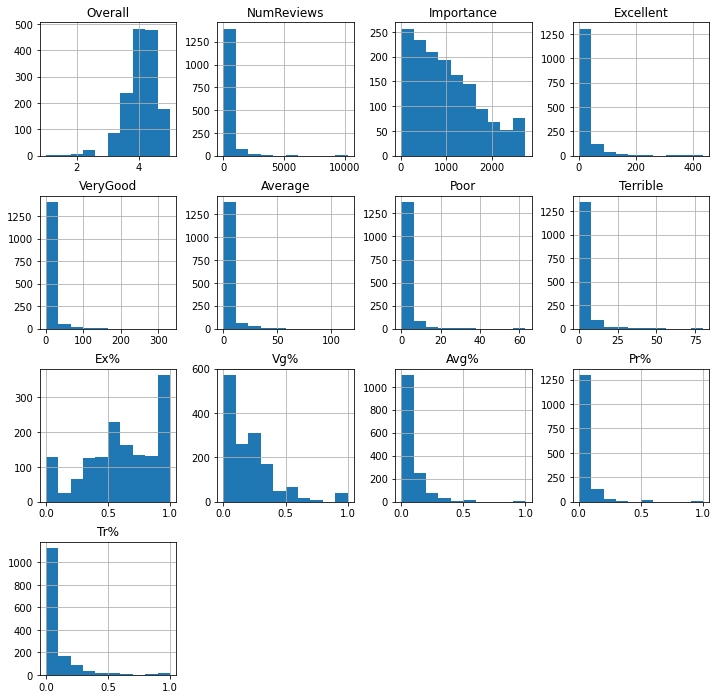

In [10]:
df.hist(['Overall', 'NumReviews', 'Importance', 
'Excellent','VeryGood', 'Average', 
'Poor', 'Terrible', 'Ex%',
'Vg%', 'Avg%', 'Pr%',
'Tr%'], figsize=(12,12))

#### At a first sight we cannot see any particular distribution on the data, maybe an exponential distribution on some datasets, but we are not sure. Therefore, we will use a test that checks if there is any disribution approved. 
#### It is interesting to compare the absolute and relative distribution of the cualitative punctuation of a restaurant. In relative terms, we can see that some restaurants get better "Excellent" than others, we see that some have a 100% of "Excellents" and others with an almost 0% of "Excellents".
#### So the next section we will review the probabilities to have a good exprience on the Excellent restaurants, this is just for apetite of knowledge since there are not direct use of this info. 

#### Using a Laplace Succession, we will add one more "bad experience" or "Excellent", and one more "good experience" or "Poor". Then we will check the probability of having a meal on the restaurant with the best experience. 

In [11]:
df[['CompanyName', 'Ex%']]

,CompanyName,Ex%
0,Cariño Nikkei,1.000000
1,Urubamba Nikkei - Fusion - Bar,0.777778
2,Fiorenzano 1897,0.000000
3,Antica Latteria Cucina Tipica Napoletana,0.745455
4,Gusto&Gusto,0.440678
...,...,...
1484,Ristorante Pizzeria La Grotta di Francesco Ven...,0.875000
1485,Pizzeria Pane Amore E Fantasia,0.750000
1486,Pizzeria Don Raffaele,0.438356
1487,Rosso Peperone,0.521739


In [12]:
df[['CompanyName', 'Ex%']].sort_values(by=['Ex%'], ascending=False)

,CompanyName,Ex%
0,Cariño Nikkei,1.0
425,Pizzeria da Mario,1.0
1080,Stà Ben!,1.0
418,Braceria Pastore,1.0
1088,Pizza Lovers addu Maurizio,1.0
...,...,...
675,Jolly Roger Pub,0.0
964,Il Buongustaio Take Away,0.0
681,Gallo's Pub 1986,0.0
966,Yummy Sushi Restaurant,0.0


In [13]:
df_laplace = df

In [14]:
df_laplace['Excellent'] = df['Excellent'] +1
df_laplace['Terrible'] = df['Terrible'] +1

In [15]:
df_laplace['row_sum'] = df_laplace[['Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].sum(axis=1)

In [16]:
df_laplace['Ex%'] = df_laplace['Excellent']/df_laplace['row_sum']
df_laplace['Vg%'] = df_laplace['VeryGood']/df_laplace['row_sum']
df_laplace['Avg%'] = df_laplace['Average']/df_laplace['row_sum']
df_laplace['Pr%'] = df_laplace['Poor']/df_laplace['row_sum']
df_laplace['Tr%'] = df_laplace['Terrible']/df_laplace['row_sum']

In [17]:
df_laplace[['CompanyName','Importance', 'Ex%']].sort_values(by=['Ex%'], ascending=False)

,CompanyName,Importance,Ex%
416,A tutta Birra,319,0.985714
1088,Pizza Lovers addu Maurizio,733,0.973684
847,Da Maria,5,0.950000
1055,OAK Wine and Craft Beer Bar,140,0.948718
666,Ciabacrò,995,0.941176
...,...,...,...
897,McDonald's,2669,0.090909
841,Roby Cars Srl,2665,0.071429
39,Pizzeria Salvatore Vesi STG,2521,0.066667
604,Ristorante la Torre,2615,0.065217


#### Just after this small check, we can see that the distribution gave us a good hint. Many restaurants had not enoght punctuations to be quantified, this quick test brought some light to the real possibility of having a good meal on any specific place. We will run a Correlation and later check it with the general correlations

In [18]:
df_laplace['NormImp'] = (df.Importance - np.min(df.Importance)) / (np.max(df.Importance) - np.min(df.Importance))

In [19]:
lp= ['Importance', 'NumReviews', 'Overall', 
'Excellent','VeryGood', 'Average', 
'Poor', 'Terrible']
df_laplaceNorm = (df_laplace[lp]-df_laplace[lp].min())/ (df_laplace[lp].max() - df_laplace[lp].min())

In [20]:
df_laplace[['NormImp','Ex%','Vg%', 'Avg%', 'Pr%', 'Tr%']].corr(method='kendall')

,NormImp,Ex%,Vg%,Avg%,Pr%,Tr%
NormImp,1.000000,-0.289532,0.000838,0.022147,0.002599,0.365215
Ex%,-0.289532,1.000000,-0.445749,-0.366706,-0.287970,-0.272792
Vg%,0.000838,-0.445749,1.000000,0.296139,0.224943,-0.212776
Avg%,0.022147,-0.366706,0.296139,1.000000,0.357021,-0.181997
Pr%,0.002599,-0.287970,0.224943,0.357021,1.000000,-0.174055
Tr%,0.365215,-0.272792,-0.212776,-0.181997,-0.174055,1.000000


Text(0.5, 0, 'Vg%')

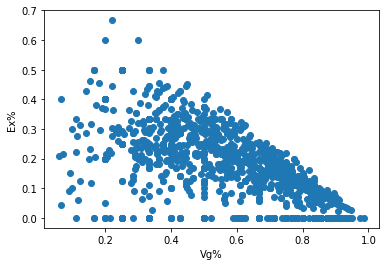

In [21]:
plt.scatter(df_laplace['Ex%'], df_laplace['Vg%'])
plt.ylabel("Ex%")
plt.xlabel("Vg%")


#### By the moment we can say that the correlation between the percentaje of "Excellents" and the "Importance" is highly negative. In this case we can observe the negative correlation as a positive one, since the most important restaurant is the 0.

In [22]:
colTest = ['Overall', 'NumReviews', 'Importance', 'Excellent','VeryGood', 'Average', 'Poor', 'Terrible', 'Ex%','Vg%', 'Avg%', 'Pr%','Tr%']

In [23]:
import pandas as pd
from fitter import get_common_distributions
from fitter import Fitter
import math as mt
from scipy import stats

## This function will split the outliers, giving us the extreme and no extreme data. The data between the upper and lower bound will be analysed in the 
## probability distribution function. Here we use the interquartilic range method

def Outliers(DataframeCol):
    '''
    Input, column of dataframe. Output, outliers and normal data. 
    '''
    test = DataframeCol.dropna()
    q1 = test.quantile(0.25)
    q3 = test.quantile(0.75)
    iqr = q3 - q1
    lowBound = q1 - 1.5 * iqr 
    upBound = q3 + 1.5 * iqr
    noOutLiers = test[~((test > upBound) | (test < lowBound))]
    Outliers = test[((test > upBound) | (test < lowBound))]
    
    return(noOutLiers, Outliers)



## The variables of this function are the column of the dataframe to analyse, the common distrubutions for fitter 'cauchy', 'chi2', 'expon', 
## 'exponpow', 'gamma', 'lognorm','norm', 'powerlaw','rayleigh', 'uniform'
def prob_dist(df_test):
    '''
    
    '''
    test = df_test
    dist = get_common_distributions()
    tester = test
    
## Here we iterate over all the distributions the dist varaible has. We will be testing the distribution untill one of them gets acceped by the 
## Kolmogrov-Smirnov goodness test. We use this specific test, given that other test are not precise for n > 5000. 
    for i in range(len(dist)):
        
        
            f = Fitter(tester, timeout = 120, distributions= dist)
            f.fit()
            f.summary(plot=False)
            distributionParameters = f.get_best()
            distToTest = list(f.get_best())[0]
            parameters = f.fitted_param[distToTest]
            bestMatch = list(distributionParameters.keys())
            ksTable = (1.36/(mt.sqrt(len(tester))))
            ksTests = stats.kstest(np.array(tester), bestMatch[0], parameters)
            ksCriteria = ksTests[1]
            
    
            if ksCriteria >= ksTable:
            # This statement checks if the Criteria valie is bigger than the value calculated in the Kolmogrov Smirnov Table for 0.05. 
            # If approved, we create the following dataframe.
                dfTest = pd.DataFrame(index = ['Distribution', 'Test', 'P-Value'] )
                column = [str(distToTest), float(ksTable), float(ksCriteria)]
                dfTest[tester.name] = column
                return(dfTest)
                break
                
            else:
            #Here the Goodness test was not accepted. So we have to delete this distribution and re-run the test. If we do not delet the distribution, we will get the 
            #same result for every i in the loop. So, at the end we would get nothing. 
                dist.remove(distToTest)


In [24]:
for i in colTest:
    df_test = Outliers(df[i])
    dist = prob_dist(df_test[0])
    print(dist)

None
None
             Importance
Distribution   exponpow
Test           0.035245
P-Value        0.551574
None
None
None
None
None
None
None
None
None
None


Now we are almost certain that most of our data has no known distribution. 

In [25]:
df.describe(percentiles=[.20, .40, .60, .75, .80])

,Importance,NumReviews,Overall,Cap,Excellent,VeryGood,Average,Poor,Terrible,Mun,Ex%,Vg%,Avg%,Pr%,Tr%,row_sum,NormImp
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,1006.839490,304.750839,4.106111,80131.143049,20.220954,7.599731,2.897918,1.682337,3.636669,3.274009,0.579941,0.148513,0.053262,0.032153,0.186131,36.037609,0.367266
std,716.640742,682.644016,0.595251,7.038609,39.659677,18.393793,7.359366,4.335458,6.735021,2.582276,0.195892,0.132289,0.074427,0.056511,0.134000,69.440118,0.261930
min,2.000000,1.000000,1.000000,80121.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.060976,0.000000,0.000000,0.000000,0.009259,3.000000,0.000000
20%,323.200000,17.000000,3.500000,80124.600000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.388889,0.000000,0.000000,0.000000,0.066667,4.000000,0.117398
40%,688.200000,55.000000,4.000000,80129.000000,4.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.529912,0.099433,0.000000,0.000000,0.125000,8.000000,0.250804
50%,882.000000,91.000000,4.000000,80132.000000,6.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.611111,0.142857,0.000000,0.000000,0.166667,12.000000,0.321637
60%,1096.800000,147.800000,4.500000,80133.000000,10.000000,3.000000,1.000000,0.000000,2.000000,3.000000,0.666667,0.190356,0.045455,0.000000,0.200000,17.000000,0.400146
75%,1475.000000,308.000000,4.500000,80135.000000,20.000000,7.000000,2.000000,1.000000,3.000000,5.000000,0.750000,0.250000,0.092593,0.050847,0.250000,34.000000,0.538377
80%,1627.800000,420.200000,4.500000,80138.000000,26.000000,9.000000,3.000000,2.000000,4.000000,5.000000,0.750000,0.266667,0.111111,0.065299,0.327451,46.400000,0.594225


The Overall column is not a very intresting way of checking if a restaurant is good or bad. The 80% of the Naples restaurants have a 4.5 Overall or more. We know that italian cusine is good, but in absolutes terms. So in relative terms, some are better than others.

The interesting thing we can get is that the 75% of the restaurants in Naples have 308 comments or less. Which it is a low number in comments due the average, however the Std is telling us we have a outliers which are having a big impact on the mean.

In [26]:
def No_Outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lowBound = q1 - 1.5 * iqr 
    upBound = q3 + 1.5 * iqr
    outliers = df[~((df[col] > upBound) | (df[col] < lowBound))]
    return(outliers)

In [27]:
dfNoOutliers = No_Outliers(df,'NumReviews')

In [28]:
dfNoOutliers.describe()

,Importance,NumReviews,Overall,Cap,Excellent,VeryGood,Average,Poor,Terrible,Mun,Ex%,Vg%,Avg%,Pr%,Tr%,row_sum,NormImp
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000
mean,1076.168048,144.100980,4.113791,80131.057272,13.051243,4.544838,1.822155,1.085908,2.898267,3.363979,0.582437,0.139624,0.049562,0.030153,0.198225,23.402411,0.392605
std,713.879239,172.602029,0.615791,7.125340,20.321372,9.992497,4.759687,3.087000,5.133017,2.623884,0.198389,0.133735,0.075340,0.057481,0.134653,38.016718,0.260921
min,2.000000,1.000000,1.000000,80121.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.060976,0.000000,0.000000,0.000000,0.009259,3.000000,0.000000
25%,499.000000,20.000000,4.000000,80125.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.428571,0.000000,0.000000,0.000000,0.090909,5.000000,0.181652
50%,985.000000,68.000000,4.000000,80131.000000,5.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.615385,0.125000,0.000000,0.000000,0.166667,9.000000,0.359284
75%,1542.000000,207.000000,4.500000,80135.000000,15.000000,5.000000,1.000000,1.000000,3.000000,5.000000,0.750000,0.241379,0.086957,0.043168,0.262726,25.000000,0.562865
max,2738.000000,729.000000,5.000000,80147.000000,210.000000,136.000000,79.000000,63.000000,81.000000,10.000000,0.985714,0.666667,0.518519,0.333333,0.847826,469.000000,1.000000


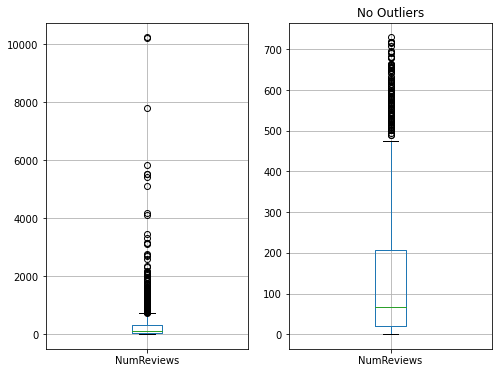

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6)) # create 2x2 array of subplots

df.boxplot(column='NumReviews', ax=axes[0])
dfNoOutliers.boxplot(column='NumReviews', ax=axes[1])
plt.title('No Outliers')
plt.show()

In [30]:
df['NumReviews'].skew()

7.449450077912809

Even with the outliers removed We see new outliers. This is related to the distribution we have on our data. Since the distribution has a strong positive Skewness 7.44, we will keep having outliers even if we remove them. Now we know that the 75% of the Restaurants have 207 comments or less removing the outliers. 

In [31]:
l= ['Importance', 'NumReviews', 'Overall', 
'Excellent','VeryGood', 'Average', 
'Poor', 'Terrible']

In [32]:
dfNorm = (df[l]-df[l].min())/ (df[l].max() - df[l].min())
dfNorm = pd.concat([dfNorm, df_laplace[['Ex%', 'Vg%', 'Avg%', 'Pr%', 'Tr%']]], axis=1)
dfNorm = pd.concat([dfNorm, df['CompanyName']], axis=1)

Since the data does not behave normally, we will use a Kendall-Tau correlation instead of a Pearson's. we will be focusing on ordinal variables and its direction. 

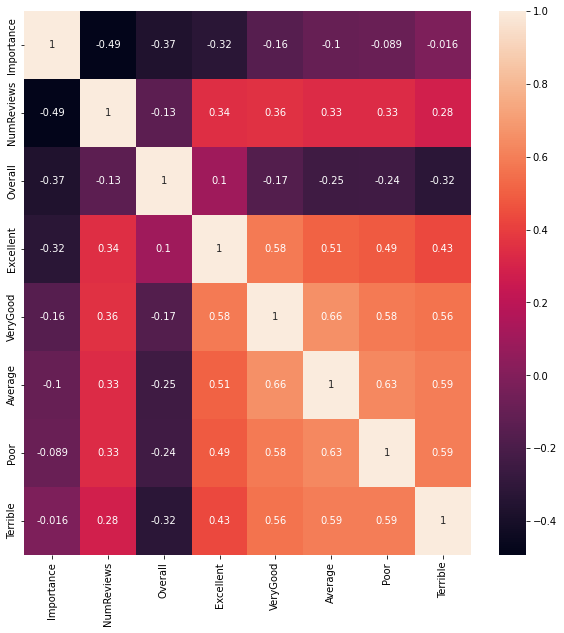

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dfNorm[['Importance', 'NumReviews', 'Overall', 
'Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].corr(method='kendall'), annot=True, ax=ax)
plt.show()

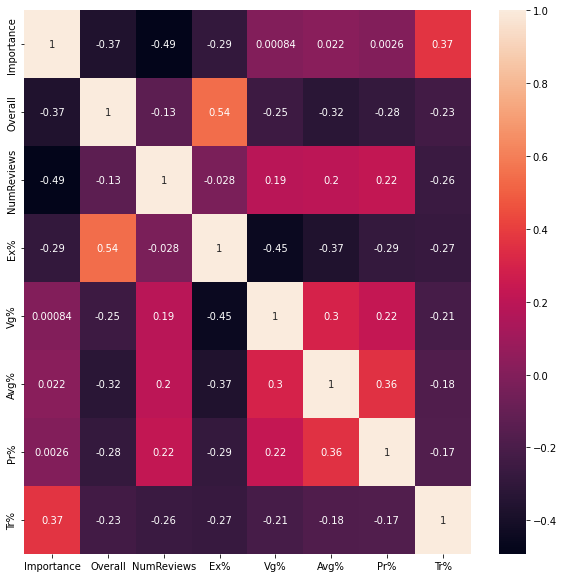

In [34]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dfNorm[['Importance', 'Overall', 'NumReviews','Ex%','Vg%', 'Avg%', 'Pr%','Tr%']].corr(method='kendall'), annot=True, ax=ax)
plt.show()

Text(0.5, 0, 'Importance')

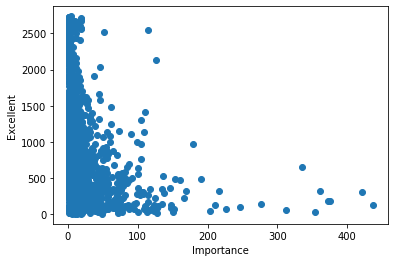

In [35]:
plt.scatter(df.Excellent, df.Importance)
plt.ylabel("Excellent")
plt.xlabel("Importance")

1 - The first correlation we see is the strong negative 49% correlation between "NumReviews" and "Importance". The negative correlations indicates the higher the NumReviews, the better ranked. In consice terms, NumRevies explains 49% of the Importance.

2- Althrough that Overall is not a really good indicator to meassure the Importance of a restarant -given the difference between absolute and relative comparissons-, it explains the 37% of the cases. Once again, this is a logical explaination, since the higher is the Overall the higher should be the Importance. Here we can do a hypothesis test, since the 50% of the restaurants have a 4 Overall or more:
H0 both quantiles have the same distribution.
H1 the data inside the second quantile of the dataset 'Overall' has a different distribution that the second one. 

3 -Excellent explains a 32% of the importance in absolute and a 29% in relative terms. As well, it has its intrinsic logic, since the more excellent there are, we are closer to a higher Overall.

4- We can also see a correlation between 'Excellent','VeryGood', 'Average', 'Poor', 'Terrible'. We can see in absolutes terms that the closer the calification (Vg and Ex are closer than Ex and Tr), the higher the correlation; however, we see that terrible has a negative explains a 43% of Excellents, this is an interesting thing to study. We have one exception with Average-VeryGood and Average-Poor. This kind of situations have been broadly studied, it is called the "". This concept explains that in odd number of answers, which have a medium answer that tends to be neutral, there is a strong tendence to select the answer. Therefore, it would have been a better denomination if the califications were even and with no central tendency: Excelent, Very Good, Poor, Terrible. In this hypotetical case, we would have more interesing information that in the current one. 

5- Now, in absolute terms we dont have a strong correlation between Excellent and Overall, 10%. However, we do see a tendence which is very interesting. We can see that 'VeryGood', 'Average', 'Poor', 'Terrible' have a behavior in which every lower calification, has a negative correlation to the Overall, therefore, we cannot say that Excellent is a good predictor of the Overall, but the other califications do are a bad predictor. However, in relative terms we have a 54% of correlation between "Overall" and "Ex%", something we will study futher as we as the relationship between the correlation of "Vg%", "Avg%" and "Tr%" and "Ex%".

6- This last point could be related to the hygenic factor. We will develop some tests to understand this phenomenom.

7- There is a week correlation between Importance and overall, which we will check again in the higher quartile since we said that Overall is not a good meassurment. 

8- Something else we can see, is that there is a small correlation between the NumReviews and the absolute calification variables. So we can check that, apparently, the customers are more willing to leave a comment if they had a good or slightly bad experience.

9- CHECK RELATIVE Now, in relative terms, the higher the Ex% the lower the other califications, but terrible. Therefore, we can say that more excelents, predicts . However, this is correlation and no causality. We dont have the real cause, but if we see on variable increasing, probably the other will increase too.

## 1- Continously, we will check the 25 quantile and above and check if the correlation of Importance and overall difears or not.

In [36]:
print(df[df.Importance <= df.Importance.quantile(0.25)][['Importance', 'NumReviews']].describe())
print('Quantile 0.25: ',df.Importance.quantile(0.25))
print(df[df.Importance >= df.Importance.quantile(0.25)][['Importance', 'NumReviews']].describe())
print('Quantile 0.25: ',df.Importance.quantile(0.25))

       Importance    NumReviews
count  373.000000    373.000000
mean   200.576408    652.391421
std    119.368489   1019.516419
min      2.000000     13.000000
25%     94.000000    179.000000
50%    197.000000    398.000000
75%    303.000000    790.000000
max    409.000000  10228.000000
Quantile 0.25:  409.0
        Importance   NumReviews
count  1117.000000  1117.000000
mean   1275.539839   188.578335
std     625.141694   470.077488
min     409.000000     1.000000
25%     757.000000    16.000000
50%    1156.000000    50.000000
75%    1667.000000   162.000000
max    2738.000000  5515.000000
Quantile 0.25:  409.0


In [37]:
print(df[df.Importance <= df.Importance.quantile(0.25)][['Importance', 'NumReviews']].corr(method='kendall'))
print(df[df.Importance >= df.Importance.quantile(0.25)][['Importance', 'NumReviews']].corr(method='kendall'))

            Importance  NumReviews
Importance    1.000000    0.006275
NumReviews    0.006275    1.000000
            Importance  NumReviews
Importance    1.000000   -0.422269
NumReviews   -0.422269    1.000000


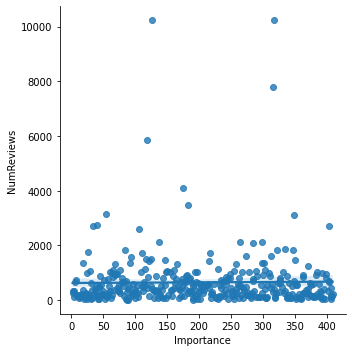

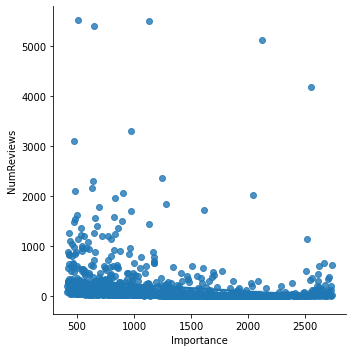

In [38]:
sns.lmplot(data=df[df.Importance <= df.Importance.quantile(0.25)][['Importance', 'NumReviews']], x='Importance', y='NumReviews')
sns.lmplot(data=df[df.Importance >= df.Importance.quantile(0.25)][['Importance', 'NumReviews']], x='Importance', y='NumReviews')

In [39]:
print(df[df.Importance <= df.Importance.quantile(0.25)][['Importance', 'NumReviews']].std())
print(df[df.Importance > df.Importance.quantile(0.25)][['Importance', 'NumReviews']].std())

Importance     119.368489
NumReviews    1019.516419
dtype: float64
Importance    624.882856
NumReviews    470.287800
dtype: float64


Insight 1: The correlation of the whole dataset is -0.49, the correlation of the first 25% is 0.006275 and for the lest 75% is 0.422269. We can say that the least 75% of the data, has a stronger wheight in the output. Therefore, the Overall in the least 75% restaurants is a better predictor that for the first 25%. This is related to the std of each dataset, if we check above the total std is lower in the second case than in the first case. Also the scatterplots show the same information.

In business words: If the restaurant has a importance of 409 or less, we recommend to have KPI's related to the quantity of reviews.

Now we have a new question, what should be an accourate KPI for a restaurant with an importance below than 409?

<AxesSubplot:>

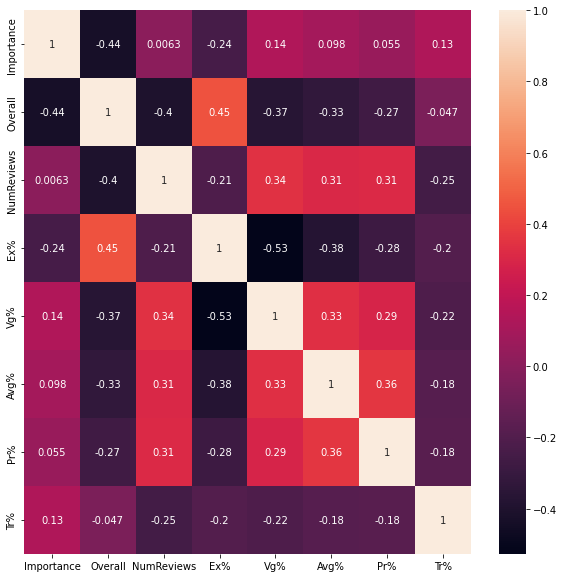

In [40]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dfNorm[dfNorm.Importance <= dfNorm.Importance.quantile(0.25)][['Importance', 
'Overall', 'NumReviews','Ex%','Vg%', 'Avg%', 'Pr%','Tr%']].corr(method='kendall'), annot=True, ax=ax)

The answer to the question is the following: 
In the case of a restaurant with an Importance bigger thatn 409, the KPIs should be based on the 'Overall' and 'Ex%'

Now we have defined KPIs in a really poor way. We have to quantify them and give real directions, however the strating point would be determined according the each restaurant

<AxesSubplot:>

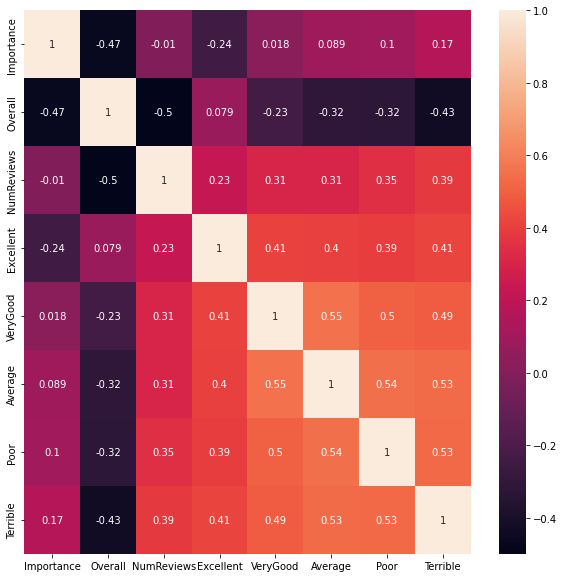

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dfNorm[dfNorm.Importance >= dfNorm.Importance.quantile(0.75)][['Importance', 
'Overall', 'NumReviews','Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].corr(method='kendall'), annot=True, ax=ax)

In [42]:
df_kpi1 = df[df.Importance >= df.Importance.quantile(0.25)][['CompanyName', 'Importance', 'NumReviews', 'Excellent','VeryGood', 'Average', 'Poor', 'Terrible']]
df_kpi1 = pd.merge(left=df_kpi1, right= df_laplace[['CompanyName','Ex%','Vg%', 'Avg%', 'Pr%', 'Tr%']], how='inner', on='CompanyName')

In [43]:
df_kpi1

,CompanyName,Importance,NumReviews,Excellent,VeryGood,Average,Poor,Terrible,Ex%,Vg%,Avg%,Pr%,Tr%
0,Cariño Nikkei,527,139.0,6,0,0,0,1,0.857143,0.000000,0.000000,0.000000,0.142857
1,Fiorenzano 1897,2383,36.0,1,0,0,1,1,0.333333,0.000000,0.000000,0.333333,0.333333
2,Gusto&Gusto,449,594.0,53,42,14,8,3,0.441667,0.350000,0.116667,0.066667,0.025000
3,Acquolina,447,495.0,17,11,8,1,5,0.404762,0.261905,0.190476,0.023810,0.119048
4,Antica Osteria da Tonino dal 1880,743,346.0,7,7,3,1,6,0.291667,0.291667,0.125000,0.041667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,Trattoria e Pizzeria Da Nancy,2613,7.0,3,1,0,1,4,0.333333,0.111111,0.000000,0.111111,0.444444
1145,Maccheroni Food,1797,3.0,4,0,0,0,1,0.800000,0.000000,0.000000,0.000000,0.200000
1146,Pizzeria Pane Amore E Fantasia,1755,4.0,4,1,0,0,1,0.666667,0.166667,0.000000,0.000000,0.166667
1147,Pizzeria Don Raffaele,876,146.0,65,45,21,8,9,0.439189,0.304054,0.141892,0.054054,0.060811


In [44]:
df_kpi1['Kpi'] = (df_kpi1['Ex%'] * df_kpi1['NumReviews']) - (df_kpi1['Excellent'] * df_kpi1['Ex%']) + df_kpi1['Terrible']

In [45]:
df_kpi1

,CompanyName,Importance,NumReviews,Excellent,VeryGood,Average,Poor,Terrible,Ex%,Vg%,Avg%,Pr%,Tr%,Kpi
0,Cariño Nikkei,527,139.0,6,0,0,0,1,0.857143,0.000000,0.000000,0.000000,0.142857,115.000000
1,Fiorenzano 1897,2383,36.0,1,0,0,1,1,0.333333,0.000000,0.000000,0.333333,0.333333,12.666667
2,Gusto&Gusto,449,594.0,53,42,14,8,3,0.441667,0.350000,0.116667,0.066667,0.025000,241.941667
3,Acquolina,447,495.0,17,11,8,1,5,0.404762,0.261905,0.190476,0.023810,0.119048,198.476190
4,Antica Osteria da Tonino dal 1880,743,346.0,7,7,3,1,6,0.291667,0.291667,0.125000,0.041667,0.250000,104.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,Trattoria e Pizzeria Da Nancy,2613,7.0,3,1,0,1,4,0.333333,0.111111,0.000000,0.111111,0.444444,5.333333
1145,Maccheroni Food,1797,3.0,4,0,0,0,1,0.800000,0.000000,0.000000,0.000000,0.200000,0.200000
1146,Pizzeria Pane Amore E Fantasia,1755,4.0,4,1,0,0,1,0.666667,0.166667,0.000000,0.000000,0.166667,1.000000
1147,Pizzeria Don Raffaele,876,146.0,65,45,21,8,9,0.439189,0.304054,0.141892,0.054054,0.060811,44.574324


#### Now based on the last database df_kpi1, we observe the KPIs to achieve in a marketing campaing of a year. That formula lacks the division by years of existence in Trip advisor. At that point we could define the KPIs objective for the first group (importance belowthan 409) as following: 
#### Reach the x quantity of reviews with a wheight of Excellent (1) and Very Good (72%) in the next year. 
#### x = Kpi column / years on trip advisor WITH REVIEWS

#### Continously we will work with the KPIs for the second group:

In [46]:
df_kpi2 = df[df.Importance <= df.Importance.quantile(0.25)][['CompanyName', 'Overall', 'Importance', 'NumReviews', 'Excellent','VeryGood', 'Average', 'Poor', 'Terrible']]
df_kpi2 = pd.merge(left=df_kpi2, right= df_laplace[['CompanyName','Ex%','Vg%', 'Avg%', 'Pr%', 'Tr%']], how='inner', on='CompanyName')

In [47]:
df_kpi2['kpi'] = (df_kpi2['Overall'] - np.min(df_kpi2['Overall'])) / (np.max(df_kpi2['Overall']) - np.min(df_kpi2['Overall'])) / (1/df_kpi2['Excellent']) + df_kpi2['Terrible']

#### KPI: 
#### achieve 0.5 more on the Overall Score if bellow 5, else mantain the 5, and the quantity of 'Excellents' fixed on the KPIs column on the next & months.  

### Conlusion: 
#### We developed the thinking to create data driven KPIs, and fixed the objectives.
#### Group 1
#### Reach the x quantity of reviews with a wheight of Excellent (1) and Very Good (72%) in the next year. 
#### x = Kpi column / years on trip advisor WITH REVIEWS
#### Group 2
#### achieve 0.5 more on the Overall Score if bellow 5, else mantain the 5, and the quantity of 'Excellents' fixed on the KPIs column on the next & months. 

## 2- Overall as indicator to meassure the Importance of a restaurant.

##### H0 both quantiles have the same distribution.
#### H1 the data inside the second quantile of the dataset 'Overall' has a different distribution that the second one. 

In [48]:
from scipy.stats import ks_2samp

x1 = df[df.Overall >= df.Overall.median()][['Overall','Importance']]
x2 = df[df.Overall <= df.Overall.median()][['Overall','Importance']]

print(ks_2samp(x1['Overall'], x2['Overall'], alternative='two-sided'))
print(ks_2samp(x1['Importance'], x2['Importance'], alternative='two-sided'))

KstestResult(statistic=0.5765845070422535, pvalue=1.735301934094566e-148)
KstestResult(statistic=0.2370744249670686, pvalue=3.298399633923283e-24)


In [49]:
print('Variance','\n', df[df.Overall >= df.Overall.median()][['Overall','Importance']].var())
print()
print('Mean','\n', df[df.Overall <= df.Overall.median()][['Overall','Importance']].mean())

Variance 
 Overall            0.127353
Importance    320935.633436
dtype: float64

Mean 
 Overall          3.690048
Importance    1236.081535
dtype: float64


#### Since the P-Value is below 0.05, we can reject the null Hypotesis. Therefore, the distribution of Overall is significanly different in the two datasets.
#### As we can see above, the quantiles does not have the similar Variances or Means. 

#### Let's see how this impacts on the correlations

In [50]:
print(df[df.Overall >= df.Overall.median()][['Overall','Importance']].corr(method='kendall'))
print(df[df.Overall < df.Overall.median()][['Overall','Importance']].corr(method='kendall'))

             Overall  Importance
Overall     1.000000   -0.082777
Importance -0.082777    1.000000
             Overall  Importance
Overall     1.000000   -0.624241
Importance -0.624241    1.000000


(array([  2.,   0.,   2.,   0.,   6.,   0.,  21.,   0.,  86., 236.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ]),
 <BarContainer object of 10 artists>)

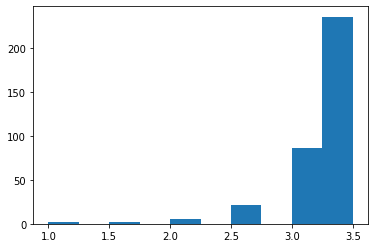

In [51]:
plt.hist(df.Overall[df.Overall < df.Overall.median()])

<AxesSubplot:>

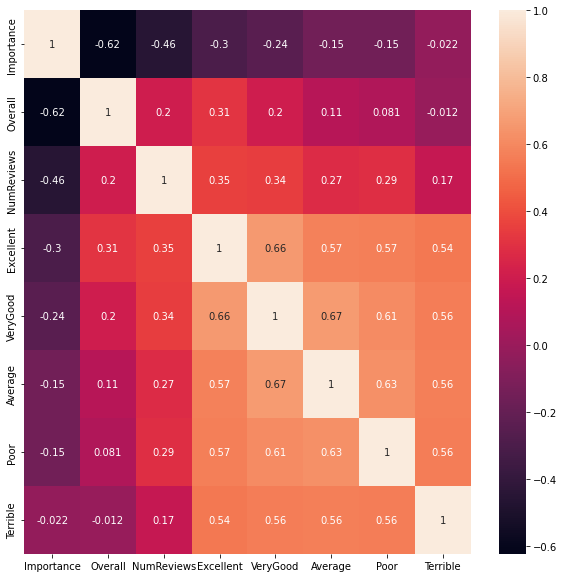

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[df.Overall < df.Overall.median()]
[['Importance', 'Overall', 'NumReviews','Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].corr(method='kendall'), annot=True, ax=ax)

<AxesSubplot:>

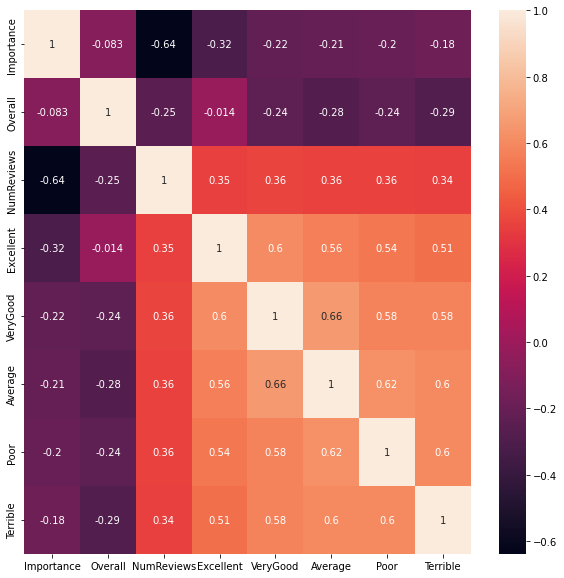

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[df.Overall >= df.Overall.median()]
[['Importance', 'Overall', 'NumReviews','Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].corr(method='kendall'), annot=True, ax=ax)

#### As we can see above, the correlations are extreamly different. It has its logic, the amplitude range of the highest Overall half is 2, in the other case it is 8. Therefore, we get much more information related to the Overall in the lowest Overall half. 

#### The other Variables are remaining with very similar values. 

## Conclusion: 
#### The lower half of the median, can use the Overall ranking as an meassure of Importance; however, in the highest half, it will not give usefull information. 

## 3 -Excellent in absolute and relative terms.

#### The importance of "Excellent" and "Terrible" reviews in each percentile.

In [54]:
x = np.percentile(df_laplaceNorm['Excellent'], np.arange(0, 100, 25))
x1 = np.percentile(df_laplace['Excellent'], np.arange(0, 100, 25))

In [55]:
df_laplace75 = df_laplaceNorm[(df_laplaceNorm.Excellent > x[3])]
df_laplace50 = df_laplace[(df_laplaceNorm.Excellent > x[2]) & (df_laplaceNorm.Excellent <= x[3])]
df_laplace25 = df_laplace[(df_laplaceNorm.Excellent > x[1]) & (df_laplaceNorm.Excellent <= x[2])]

Percentile 75: Excellent bigger than 20.0
Data lenght 356


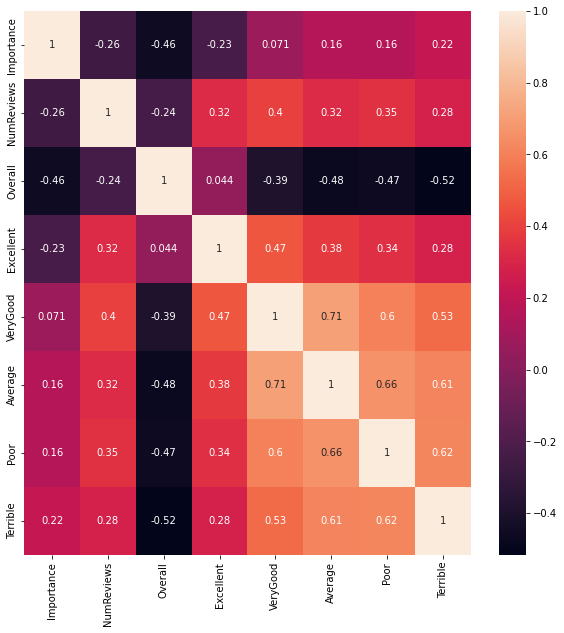

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
print('Percentile 75: Excellent bigger than %s'%(x1[3])) 
print('Data lenght %s'%(len(df_laplace75.Excellent)))
sns.heatmap(df_laplace75[['Importance', 'NumReviews', 'Overall', 
'Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].corr(method='kendall'), annot=True, ax=ax)
plt.show()


Percentile 50: Excellent above 6.0 and below 20.0
Data lenght 379


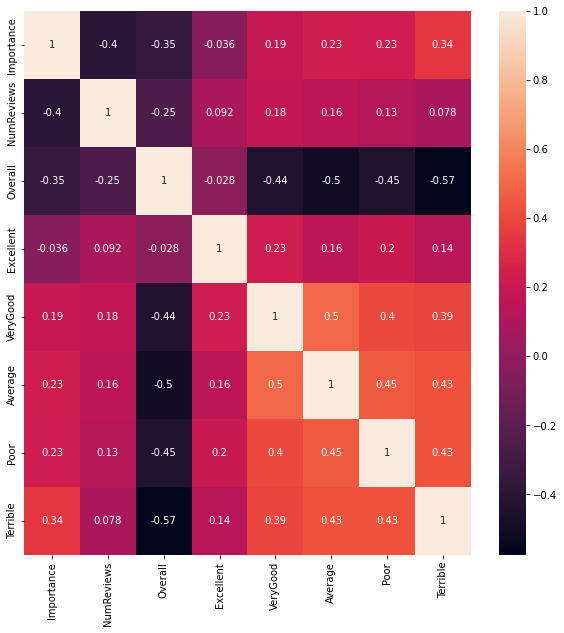

Percentile 25: Excellent above 3.0 and below 6.0
Data lenght 255


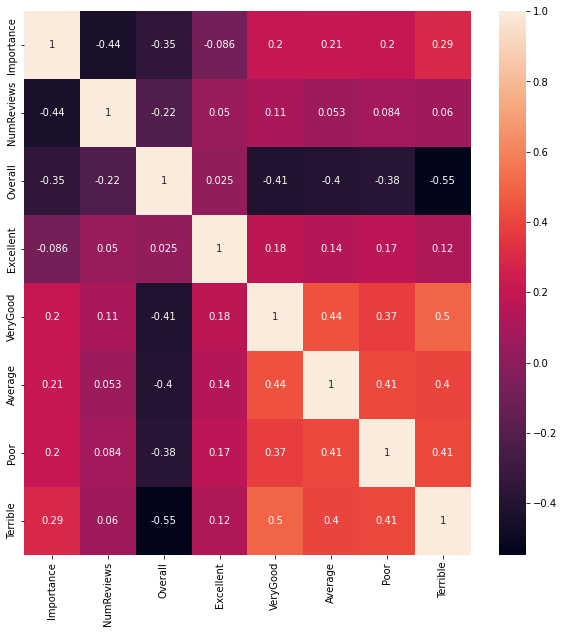

In [57]:
fig, ax = plt.subplots(figsize=(10,10)) 
print('Percentile 50: Excellent above %s and below %s'%(x1[2], x1[3]))
print('Data lenght %s'%(len(df_laplace50.Excellent)))
sns.heatmap(df_laplace50[['Importance', 'NumReviews', 'Overall', 
'Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].corr(method='kendall'), annot=True, ax=ax)
plt.show()
fig, ax = plt.subplots(figsize=(10,10)) 
print('Percentile 25: Excellent above %s and below %s'%(x1[1], x1[2]))
print('Data lenght %s'%(len(df_laplace25.Excellent)))
sns.heatmap(df_laplace25[['Importance', 'NumReviews', 'Overall', 
'Excellent','VeryGood', 'Average', 'Poor', 'Terrible']].corr(method='kendall'), annot=True, ax=ax)
plt.show()

#### In absolute terms, we an observe the folowing: 
#### Percentile 75 (Restaurants with more than 20 'Excellent' reviews): Importance -0.23%, NumReviews 0.32%.
#### Percentile 50 (Restaurants with more than 6.0 'Excellent' reviews and below 20.0): Importance -0.036%, NumReviews 0.092%
#### Percentile 25 (Restaurants with more than 3.0 'Excellent' reviews and below 6.0): Importance -0.036%, NumReviews 0.092%
## Conclusion:
#### 'Excellent' is no a good meassure to correlate with 'Importance', only the Percentile 75 and above can find a important correlation, this is having more than 20 'Excellent' reviews. Therefore, if a restaurant has less of 20 reviews, 'Excellent' is not a good predictor of 'Importance'. There are other interesting correlations which we will review in the next section. 